# AH2179 Applied Artificial Intelligence in Transportation Group 5 Project
### By Fabian Fermazin, William Öman, Itsuki Shindo

In [82]:
pip install calmap

In [106]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import calmap

In [107]:
df = pd.read_csv('Dataset-PT_seasons.csv')
Stockholmtemp2022 = pd.read_csv('Stockholmtemp2022.csv', sep=';')

In [108]:
# Change the date format of Stockholmtemp2022 to match the df
def change_date_format(date_str):
    date_obj = pd.to_datetime(date_str)
    return date_obj.strftime("%Y%m%d")
Stockholmtemp2022["date"] = Stockholmtemp2022["date"].apply(change_date_format)

# Change the name of the date column to match the df
Stockholmtemp2022["Calendar_date"] = 0
Stockholmtemp2022["Calendar_date"] = Stockholmtemp2022["date"]
Stockholmtemp2022.drop(columns=["date"])

,temp,Calendar_date
0,-1.4,20220101
1,1.9,20220102
2,3.6,20220103
3,0.6,20220104
4,-2.2,20220105
...,...,...
176,23.1,20220626
177,24.1,20220627
178,24.1,20220628
179,19.6,20220629


In [109]:
# Merge df and Stockholmtemp2022
Stockholmtemp2022["Calendar_date"] = Stockholmtemp2022["Calendar_date"].astype(int)
df = pd.merge(df, Stockholmtemp2022, on='Calendar_date')
df.drop(columns=['date'])

,Calendar_date,route_id,bus_id,stop_sequence,arrival_delay,dwell_time,travel_time_for_previous_section,scheduled_travel_time,upstream_stop_delay,origin_delay,...,factor(temperature)Cold,factor(temperature)Extra_cold,factor(temperature)Normal,factor(day_of_week)weekday,factor(day_of_week)weekend,factor(time_of_day)Afternoon_peak,factor(time_of_day)Morning_peak,factor(time_of_day)Off-peak,Season,temp
0,20220108,4,41344,1,151,0,0,120,100,100.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,Winter,-0.5
1,20220108,4,41344,2,185,24,171,45,151,100.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,Winter,-0.5
2,20220108,4,41344,3,186,0,55,41,185,100.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,Winter,-0.5
3,20220108,4,41344,4,202,12,42,94,186,100.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,Winter,-0.5
4,20220108,4,41344,5,242,21,98,86,202,100.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,Winter,-0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437653,20220518,4,41362,11,535,34,127,146,577,426.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,Spring,12.7
437654,20220518,4,41362,12,492,41,70,123,535,426.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,Spring,12.7
437655,20220518,4,41362,13,508,78,39,118,492,426.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,Spring,12.7
437656,20220518,4,41362,14,456,39,56,176,508,426.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,Spring,12.7


In [97]:
corr_matrix = df.corr()
corr_matrix['arrival_delay'].sort_values(ascending=False)

<ipython-input-97-536349da8134>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


arrival_delay                        1.000000
upstream_stop_delay                  0.971028
origin_delay                         0.671929
previous_bus_delay                   0.263712
factor(day_of_week)weekend           0.225677
factor(time_of_day)Off-peak          0.142624
Calendar_date                        0.106778
stop_sequence                        0.104499
dwell_time                           0.101145
travel_time_for_previous_section     0.075978
temp                                 0.062064
factor(weather)Rain                  0.031926
factor(weather)Normal                0.007708
factor(temperature)Normal            0.006667
factor(temperature)Cold              0.002594
factor(weather)Snow                  0.002510
factor(weather)Light_Snow           -0.008185
bus_id                              -0.015727
factor(weather)Light_Rain           -0.021177
factor(temperature)Extra_cold       -0.022755
previous_trip_travel_time           -0.053308
factor(time_of_day)Morning_peak   

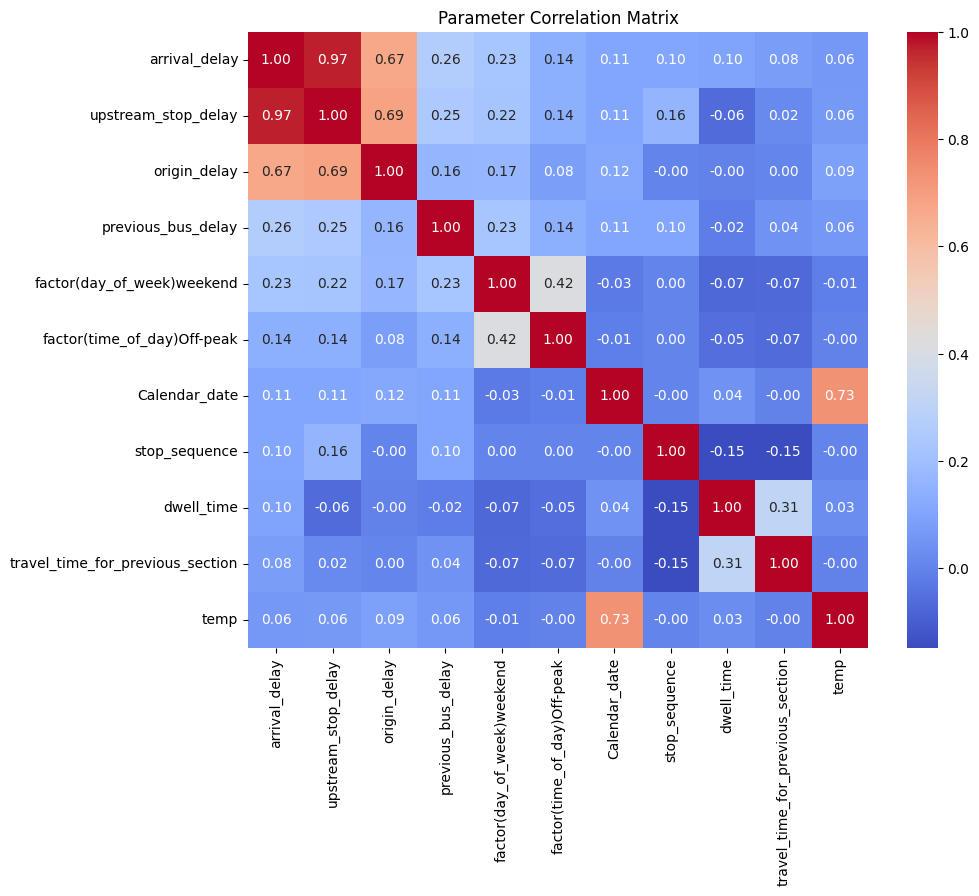

In [98]:
x = df[['arrival_delay', 'upstream_stop_delay', 'origin_delay', 'previous_bus_delay',
        'factor(day_of_week)weekend', 'factor(time_of_day)Off-peak', 'Calendar_date',
        'stop_sequence', 'dwell_time','travel_time_for_previous_section', 'temp']]

# Calculate the correlation matrix
correlation_matrix = x.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Parameter Correlation Matrix')
plt.show()

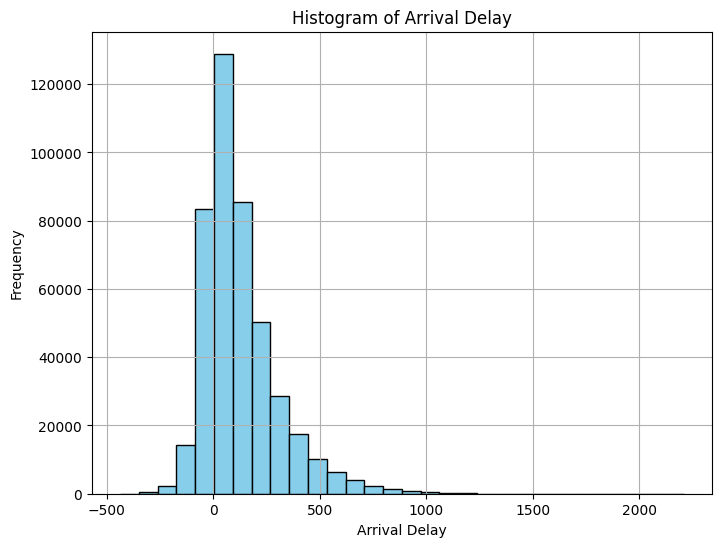

In [99]:
plt.figure(figsize=(8, 6))
plt.hist(df['arrival_delay'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Arrival Delay')
plt.xlabel('Arrival Delay')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Note to self: 594 rows in the first day, which corresponds to 22 trips in a day, if there are 27 stops.